# TTT4185 Machine learning for Speech technology

## Computer assigment 3a: Classification using Deep Neural Networks

This assignment assumes that the student has reviewed the material on deep neural networks.

In this assignment we will use the high level `Keras` framework together with `Tensorflow` to perform some deep learning experiments.

We will be using a small database of phonemes, where each phoneme is represented by the four first formant positions ("F1"-"F4") and their corresponding bandwidths ("B1"-"B4"). All numbers are in kHz. In addition, the speaker ID and the gender of the speaker are given for each phoneme.

The first few cells of this notebook contain example code to load and extract data, setup a simple network and train a deep neural network for classification. 

Note that we do not have a test dataset, but only training and validation sets. We do some experiments on the training set and observe the effect on the validation set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

In [2]:
# Load data from CSV files 
rawtrain = pd.read_csv("Train.csv")
rawvalid = pd.read_csv("Validation.csv")

# Take a peek at the raw data
rawtrain.head(10)

,SpeakerID,Gender,Phoneme,F1,F2,F3,F4,B1,B2,B3,B4
0,cjf0,F,h#,0.701982,2.125440,2.433528,3.530050,0.264459,0.326273,0.300301,0.410096
1,cjf0,F,q,0.340942,2.594934,2.788244,4.028250,0.282159,0.471724,0.310578,0.505835
2,cjf0,F,iy,0.487078,2.605132,3.093409,4.354061,0.174520,0.340025,0.232818,0.413965
3,cjf0,F,v,0.505536,2.034326,2.804329,4.130655,0.190478,0.307295,0.301741,0.370238
4,cjf0,F,ih,0.524527,2.055382,2.989248,4.480000,0.164466,0.312337,0.301859,0.362134
5,cjf0,F,n,0.601591,2.046562,3.251497,4.561420,0.185757,0.334235,0.316704,0.381524
6,cjf0,F,eh,0.762154,2.127740,3.212496,4.412842,0.207840,0.303633,0.285026,0.384152
7,cjf0,F,n,0.714553,1.837149,3.218620,5.001730,0.252105,0.311876,0.333318,0.432281
8,cjf0,F,q,0.619766,2.276717,3.109751,4.658425,0.231525,0.314789,0.406002,0.417538
9,cjf0,F,ix,0.463761,2.181577,2.859900,4.327639,0.170244,0.319690,0.291556,0.425367


In [3]:
# We will be classifying three different vowels. Extract the training and validation data
phonemes = ["ae", "ey", "ux"]
train = rawtrain[rawtrain["Phoneme"].isin(phonemes)]
valid = rawvalid[rawvalid["Phoneme"].isin(phonemes)]
trainlabels = [phonemes.index(ph) for ph in train["Phoneme"]]
validlabels = [phonemes.index(ph) for ph in valid["Phoneme"]]

In [4]:
# Features to use
features = ["F1","F2"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean
x_mean = np.mean(x_train_raw)
x_std = np.std(x_train_raw)
x_train = x_train_raw - x_mean
x_valid = x_valid_raw - x_mean

# Fix labels. The "to_categorical" call maps integer labels {n}
# to a vector of length N (number of labels) with a one in position n
y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
y_valid = keras.utils.to_categorical(validlabels, len(phonemes))

/Applications/miniconda3/envs/Ass3ML/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [5]:
# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(256, activation=tf.nn.relu, input_dim=x_train.shape[1]),
    keras.layers.Dense(len(phonemes), activation=tf.nn.softmax)
])
model.summary()

# Train the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                    epochs=1000, batch_size=32, verbose=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               768       
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 1539 (6.01 KB)
Trainable params: 1539 (6.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/1000
18/18 [==============================] - 0s 5ms/step - loss: 1.0666 - accuracy: 0.4263 - val_loss: 1.0563 - val_accuracy: 0.4207
Epoch 2/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.9970 - accuracy: 0.5090 - val_loss: 1.0594 - val_accuracy: 0.4207
Epoch 3/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.9793 - accuracy: 0.5090 - val_loss: 1.0451 - val_accuracy: 0

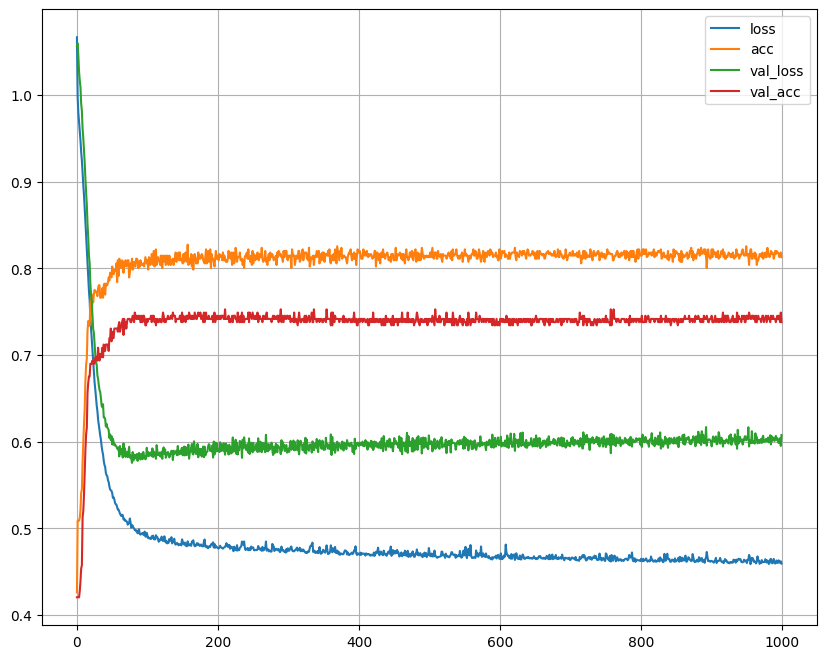

In [6]:
# Visualize the training results
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_loss'],label='val_loss')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.grid()
plt.legend()
plt.show()

In [7]:
# Validation model
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

Validation loss: 0.6077648401260376
Validation accuracy: 0.7380073666572571


## Problem 1
Increase the number of features to include "F3" and "F4" and rerun the experiments. Try also adding the bandwidths ("B1"-"B4").

In [8]:
# Features to use, now including F3, F4
features = ["F1", "F2", "F3", "F4"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean and unit variance
x_mean = np.mean(x_train_raw, axis=0)
x_std = np.std(x_train_raw, axis=0)
x_train = (x_train_raw - x_mean) / x_std
x_valid = (x_valid_raw - x_mean) / x_std

# Convert integer labels to one-hot encodings
y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
y_valid = keras.utils.to_categorical(validlabels, len(phonemes))

# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_dim=len(features)),
    keras.layers.Dense(len(phonemes), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=1000, batch_size=32,
                    validation_data=(x_valid, y_valid), verbose=1)



Epoch 1/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.9863 - accuracy: 0.5971 - val_loss: 0.9092 - val_accuracy: 0.6642
Epoch 2/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.8122 - accuracy: 0.7338 - val_loss: 0.7880 - val_accuracy: 0.6827
Epoch 3/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.7086 - accuracy: 0.7428 - val_loss: 0.7127 - val_accuracy: 0.7085
Epoch 4/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.6456 - accuracy: 0.7482 - val_loss: 0.6686 - val_accuracy: 0.6937
Epoch 5/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5964 - accuracy: 0.7536 - val_loss: 0.6258 - val_accuracy: 0.7269
Epoch 6/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5636 - accuracy: 0.7698 - val_loss: 0.6073 - val_accuracy: 0.7343
Epoch 7/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5394 - accuracy: 0.7788 - val_loss: 0.5975 - val_accuracy: 0.7491
Epoch 

Validation loss: 1.186596393585205
Validation accuracy: 0.76752769947052


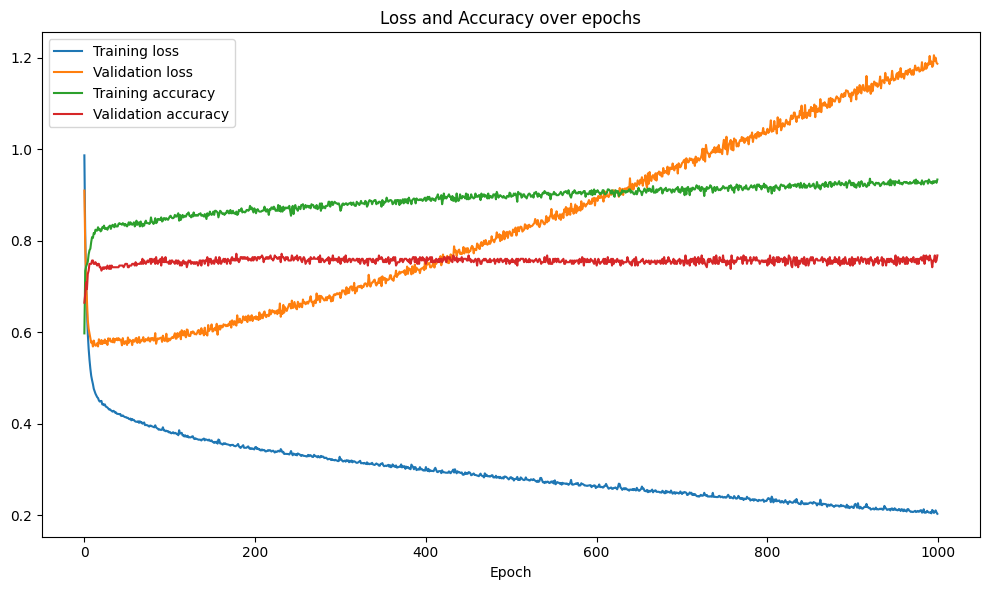

In [9]:
# Visualize the training results
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Loss and Accuracy over epochs')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()

# Evaluate the model on the validation set
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

In [10]:
# Features to use, now including F3, F4 and B1-B4
features = ["F1", "F2", "F3", "F4", "B1", "B2", "B3", "B4"]

# Extract features
x_train_raw = train[features]
x_valid_raw = valid[features]

# Normalize to zero mean and unit variance
x_mean = np.mean(x_train_raw, axis=0)
x_std = np.std(x_train_raw, axis=0)
x_train = (x_train_raw - x_mean) / x_std
x_valid = (x_valid_raw - x_mean) / x_std

# Convert integer labels to one-hot encodings
y_train = keras.utils.to_categorical(trainlabels, len(phonemes))
y_valid = keras.utils.to_categorical(validlabels, len(phonemes))

# Create a model with a single hidden layer
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_dim=len(features)),
    keras.layers.Dense(len(phonemes), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=1000, batch_size=32,
                    validation_data=(x_valid, y_valid), verbose=1)



Epoch 1/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.9965 - accuracy: 0.5036 - val_loss: 0.8927 - val_accuracy: 0.6310
Epoch 2/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.7885 - accuracy: 0.7446 - val_loss: 0.7706 - val_accuracy: 0.6937
Epoch 3/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.6827 - accuracy: 0.7698 - val_loss: 0.7045 - val_accuracy: 0.6974
Epoch 4/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.6145 - accuracy: 0.7860 - val_loss: 0.6713 - val_accuracy: 0.6974
Epoch 5/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5659 - accuracy: 0.7860 - val_loss: 0.6479 - val_accuracy: 0.7011
Epoch 6/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5331 - accuracy: 0.7932 - val_loss: 0.6357 - val_accuracy: 0.7085
Epoch 7/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5107 - accuracy: 0.7986 - val_loss: 0.6269 - val_accuracy: 0.7048
Epoch 

Validation loss: 3.4976704120635986
Validation accuracy: 0.7047970294952393


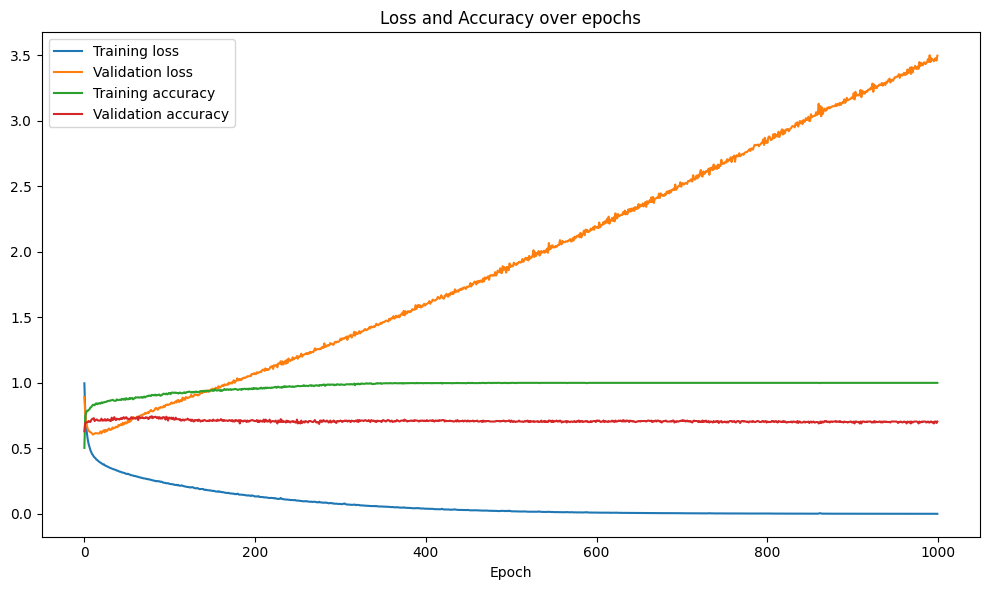

In [11]:
# Visualize the training results
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Loss and Accuracy over epochs')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()

# Evaluate the model on the validation set
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

## Problem 2
Change the number of nodes in the hidden layer and see how the results change. Try using dropout, and observe the results.

In [12]:
# number_of_nodes = 64

from tensorflow.keras.layers import Dropout

number_of_nodes = 64

# Create a new model with the selected number of nodes and dropout
model = keras.Sequential([
    keras.layers.Dense(number_of_nodes, activation='relu', input_dim=len(features)),
    Dropout(0.5),  # 50% dropout rate; change the rate to experiment with different values
    keras.layers.Dense(len(phonemes), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=1000, batch_size=32,
                    validation_data=(x_valid, y_valid), verbose=1)



Epoch 1/1000
18/18 [==============================] - 0s 4ms/step - loss: 1.0878 - accuracy: 0.4335 - val_loss: 0.9464 - val_accuracy: 0.5756
Epoch 2/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.9488 - accuracy: 0.5468 - val_loss: 0.8835 - val_accuracy: 0.6236
Epoch 3/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.8748 - accuracy: 0.6133 - val_loss: 0.8409 - val_accuracy: 0.6273
Epoch 4/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.8131 - accuracy: 0.6691 - val_loss: 0.8112 - val_accuracy: 0.6458
Epoch 5/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.7871 - accuracy: 0.6655 - val_loss: 0.7857 - val_accuracy: 0.6716
Epoch 6/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.7327 - accuracy: 0.7230 - val_loss: 0.7594 - val_accuracy: 0.6937
Epoch 7/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.7342 - accuracy: 0.6906 - val_loss: 0.7387 - val_accuracy: 0.6900
Epoch 

Validation loss: 1.0958442687988281
Validation accuracy: 0.7195571660995483


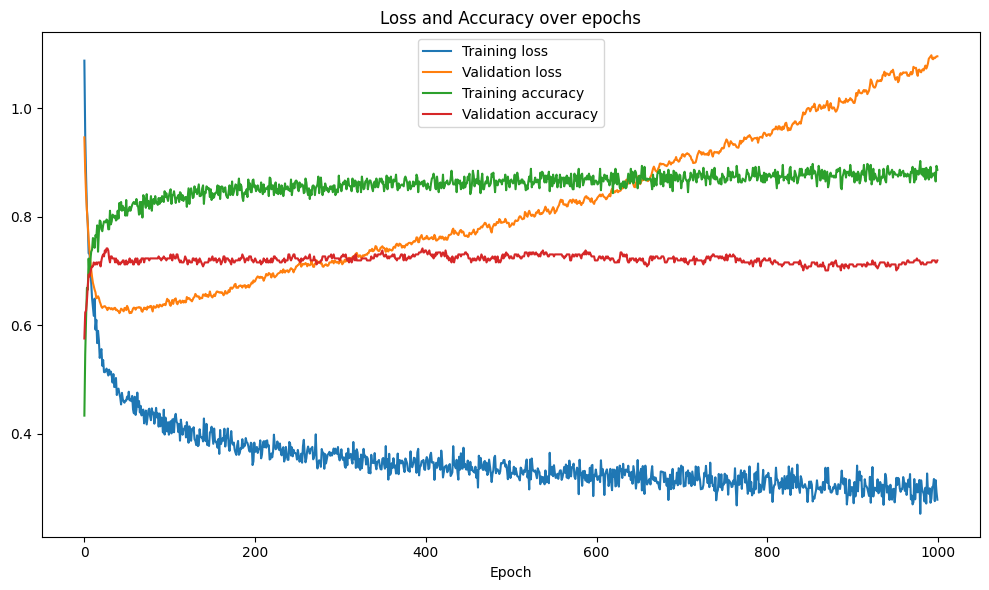

In [13]:
# Visualize the training results
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Loss and Accuracy over epochs')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()

# Evaluate the model on the validation set
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])


In [14]:
# number_of_nodes = 128

from tensorflow.keras.layers import Dropout

number_of_nodes = 128

# Create a new model with the selected number of nodes and dropout
model = keras.Sequential([
    keras.layers.Dense(number_of_nodes, activation='relu', input_dim=len(features)),
    Dropout(0.5),  # 50% dropout rate; change the rate to experiment with different values
    keras.layers.Dense(len(phonemes), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=1000, batch_size=32,
                    validation_data=(x_valid, y_valid), verbose=1)



Epoch 1/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.9845 - accuracy: 0.5360 - val_loss: 0.9241 - val_accuracy: 0.5867
Epoch 2/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.8702 - accuracy: 0.6403 - val_loss: 0.8487 - val_accuracy: 0.6199
Epoch 3/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.8014 - accuracy: 0.6601 - val_loss: 0.7952 - val_accuracy: 0.6347
Epoch 4/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.7291 - accuracy: 0.7176 - val_loss: 0.7528 - val_accuracy: 0.6642
Epoch 5/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.6900 - accuracy: 0.7194 - val_loss: 0.7200 - val_accuracy: 0.6974
Epoch 6/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.6563 - accuracy: 0.7428 - val_loss: 0.6967 - val_accuracy: 0.7048
Epoch 7/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.6321 - accuracy: 0.7518 - val_loss: 0.6803 - val_accuracy: 0.7048
Epoch 

Validation loss: 1.299688458442688
Validation accuracy: 0.7158671617507935


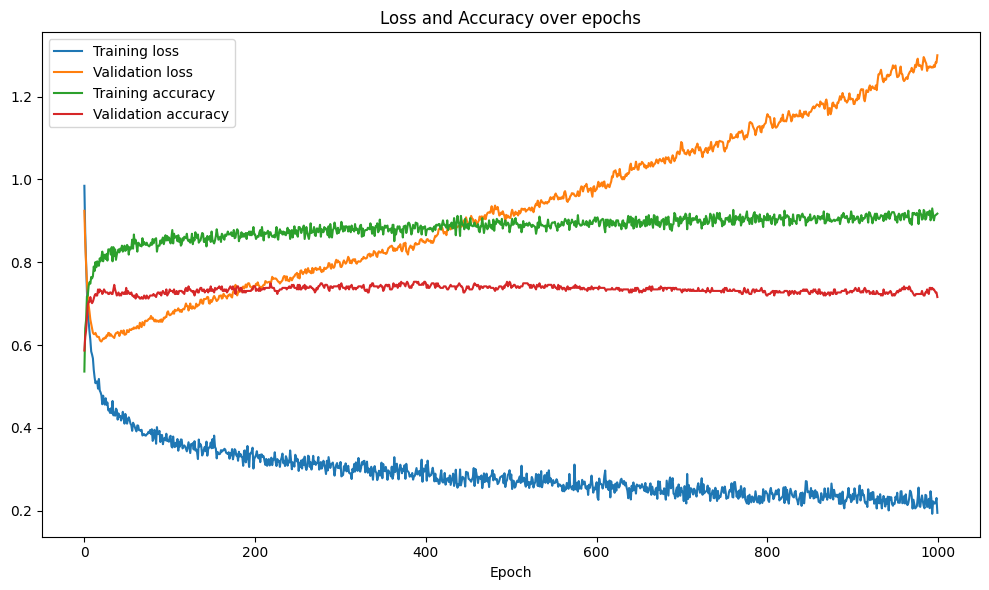

In [15]:
# Visualize the training results
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Loss and Accuracy over epochs')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()

# Evaluate the model on the validation set
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])


In [16]:
# number_of_nodes = 256

from tensorflow.keras.layers import Dropout

number_of_nodes = 256

# Create a new model with the selected number of nodes and dropout
model = keras.Sequential([
    keras.layers.Dense(number_of_nodes, activation='relu', input_dim=len(features)),
    Dropout(0.5),  # 50% dropout rate; change the rate to experiment with different values
    keras.layers.Dense(len(phonemes), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=1000, batch_size=32,
                    validation_data=(x_valid, y_valid), verbose=1)



Epoch 1/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.9869 - accuracy: 0.5881 - val_loss: 0.9067 - val_accuracy: 0.6199
Epoch 2/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.8148 - accuracy: 0.6853 - val_loss: 0.8068 - val_accuracy: 0.6605
Epoch 3/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.7257 - accuracy: 0.7266 - val_loss: 0.7593 - val_accuracy: 0.6827
Epoch 4/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.6761 - accuracy: 0.7392 - val_loss: 0.7156 - val_accuracy: 0.6827
Epoch 5/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.6217 - accuracy: 0.7662 - val_loss: 0.6831 - val_accuracy: 0.6863
Epoch 6/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.6046 - accuracy: 0.7716 - val_loss: 0.6695 - val_accuracy: 0.6974
Epoch 7/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5605 - accuracy: 0.7806 - val_loss: 0.6575 - val_accuracy: 0.6974
Epoch 

Validation loss: 1.6715651750564575
Validation accuracy: 0.7195571660995483


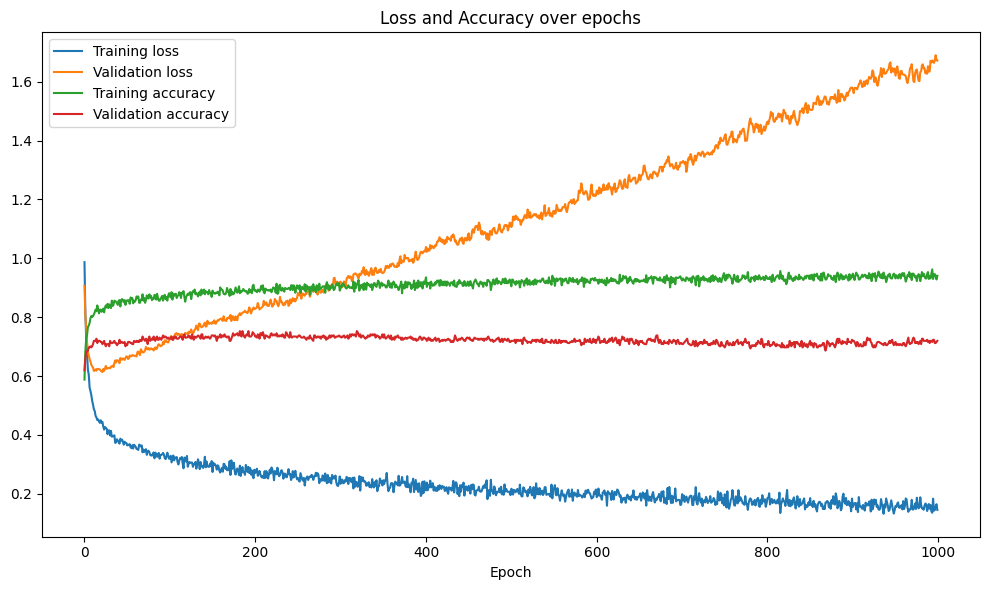

In [17]:
# Visualize the training results
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Loss and Accuracy over epochs')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()

# Evaluate the model on the validation set
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

In [18]:
# number_of_nodes = 512

from tensorflow.keras.layers import Dropout

number_of_nodes = 512

# Create a new model with the selected number of nodes and dropout
model = keras.Sequential([
    keras.layers.Dense(number_of_nodes, activation='relu', input_dim=len(features)),
    Dropout(0.5),  # 50% dropout rate; change the rate to experiment with different values
    keras.layers.Dense(len(phonemes), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=1000, batch_size=32,
                    validation_data=(x_valid, y_valid), verbose=1)



Epoch 1/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.9588 - accuracy: 0.5701 - val_loss: 0.8531 - val_accuracy: 0.6642
Epoch 2/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.7629 - accuracy: 0.7356 - val_loss: 0.7494 - val_accuracy: 0.6900
Epoch 3/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.6511 - accuracy: 0.7590 - val_loss: 0.6936 - val_accuracy: 0.6974
Epoch 4/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5967 - accuracy: 0.7716 - val_loss: 0.6676 - val_accuracy: 0.6863
Epoch 5/1000
18/18 [==============================] - 0s 1ms/step - loss: 0.5524 - accuracy: 0.7806 - val_loss: 0.6480 - val_accuracy: 0.6900
Epoch 6/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.5235 - accuracy: 0.7896 - val_loss: 0.6331 - val_accuracy: 0.6974
Epoch 7/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4987 - accuracy: 0.8076 - val_loss: 0.6210 - val_accuracy: 0.7011
Epoch 

Validation loss: 2.2248196601867676
Validation accuracy: 0.7011070251464844


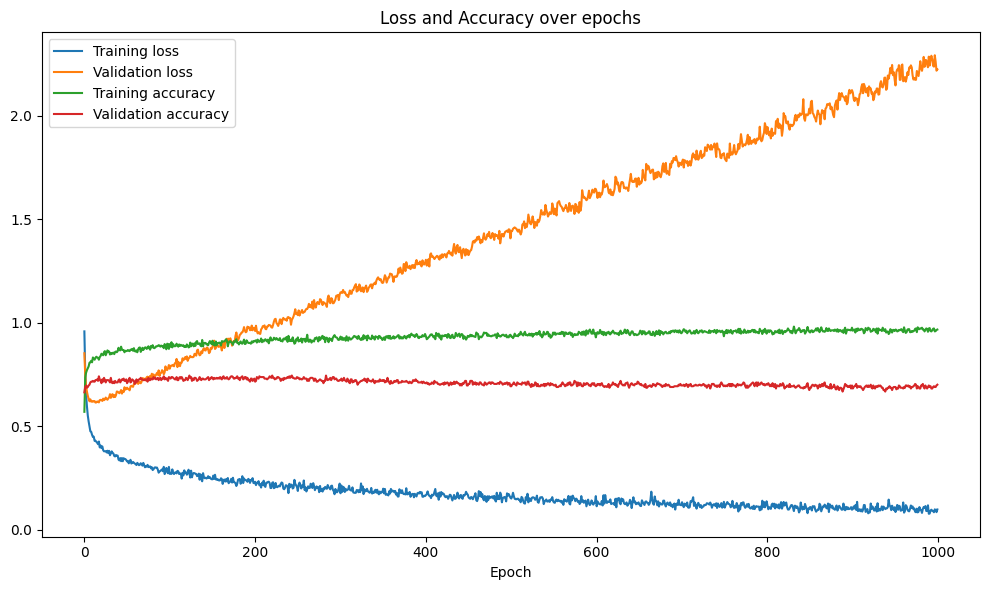

In [19]:
# Visualize the training results
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Loss and Accuracy over epochs')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()

# Evaluate the model on the validation set
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

<title>Validation Results</title>
<style>
  table {
    width: 100%;
    border-collapse: collapse;
  }
  th, td {
    border: 1px solid black;
    padding: 8px;
    text-align: left;
  }
  .highlight-green {
    background-color: green; /* colore verde per evidenziare */
  }
  .highlight-red {
    background-color: red; /* colore rosso per evidenziare */
  }
</style>

<h2>Validation Results</h2>

<table>
  <tr>
    <th>Features</th>
    <th>Number of nodes</th>
    <th>Validation Loss</th>
    <th>Validation Accuracy</th>
  </tr>
  <tr>
    <td>F1-F2</td>
    <td>1</td>
    <td class="highlight-green">0.5988</td>
    <td>74.17%</td>
  </tr>
  <tr>
    <td>F1-F4</td>
    <td>1</td>
    <td>1.2337</td>
    <td class="highlight-green">75.28%</td>
  </tr>
  <tr>
    <td>F1-F4, B1-B4</td>
    <td>1</td>
    <td class="highlight-red">3.1989</td>
    <td>70.48%</td>
  </tr>
  <tr>
    <td>F1-F4, B1-B4</td>
    <td>64</td>
    <td>1.0848</td>
    <td>73.43%</td>
  </tr>
  <tr>
    <td>F1-F4, B1-B4</td>
    <td>128</td>
    <td>1.3083</td>
    <td>72.32%</td>
  </tr>
  <tr>
    <td>F1-F4, B1-B4</td>
    <td>256</td>
    <td>1.6923</td>
    <td>71.22%</td>
  </tr>
  <tr>
    <td>F1-F4, B1-B4</td>
    <td>512</td>
    <td>2.2431</td>
    <td class="highlight-red">69.74%</td>
  </tr>
</table>



Untill this point we can say that the best performance are of the NN with F1-F2 features, 1 node and $74.17$ % of accuracy, the simplest one.

Increasing the number of nodes we don't improve the performance.

## Problem 3
Add multiple layers to the network and observe the results.

In [20]:
# Create a deeper model with multiple hidden layers
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_dim=len(features)),
    keras.layers.Dense(128, activation='relu'),                             # Second hidden layer added
    keras.layers.Dense(64, activation='relu'),                              # Third hidden layer added
    keras.layers.Dense(len(phonemes), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=1000, batch_size=32,
                    validation_data=(x_valid, y_valid), verbose=1)


Epoch 1/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.8915 - accuracy: 0.6169 - val_loss: 0.7578 - val_accuracy: 0.6605
Epoch 2/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.6044 - accuracy: 0.7644 - val_loss: 0.6617 - val_accuracy: 0.7232
Epoch 3/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4994 - accuracy: 0.7878 - val_loss: 0.6541 - val_accuracy: 0.7159
Epoch 4/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4437 - accuracy: 0.8327 - val_loss: 0.7128 - val_accuracy: 0.6974
Epoch 5/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4264 - accuracy: 0.8417 - val_loss: 0.6650 - val_accuracy: 0.7048
Epoch 6/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.4143 - accuracy: 0.8381 - val_loss: 0.6780 - val_accuracy: 0.7159
Epoch 7/1000
18/18 [==============================] - 0s 2ms/step - loss: 0.3970 - accuracy: 0.8345 - val_loss: 0.6347 - val_accuracy: 0.7122
Epoch 

Validation loss: 7.078862190246582
Validation accuracy: 0.6826568245887756


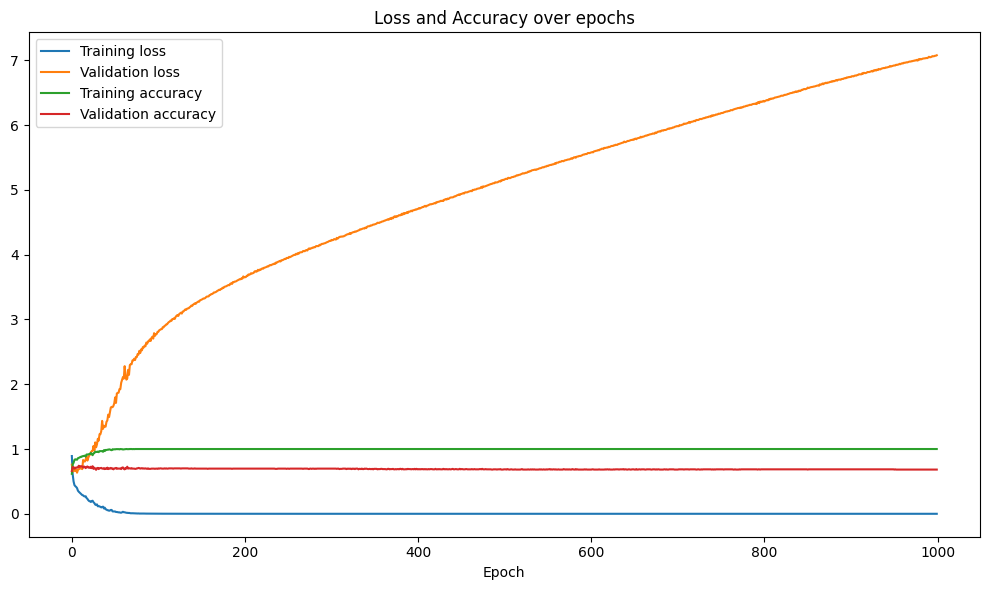

In [21]:
# Visualize the training results
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Loss and Accuracy over epochs')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()

# Evaluate the model on the validation set
score = model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', score[0])
print('Validation accuracy:', score[1])

## Problem 4
Use the data to predict the gender of the speaker. Try including the format bandwidths as features as well ("B1"-"B4").

In [22]:
features = ["F1", "F2", "F3", "F4", "B1", "B2", "B3", "B4"]

# Feature extraction
x_train_raw = rawtrain[features]
x_valid_raw = rawvalid[features]

# Normalizzation
x_mean = np.mean(x_train_raw, axis=0)
x_std = np.std(x_train_raw, axis=0)
x_train = (x_train_raw - x_mean) / x_std
x_valid = (x_valid_raw - x_mean) / x_std

# Binary conversion from the genre labels
# 0 for male, 1 for female
gender_to_binary = {'M': 0, 'F': 1}
y_train = rawtrain['Gender'].map(gender_to_binary).values
y_valid = rawvalid['Gender'].map(gender_to_binary).values

# Model cration for genre classification
gender_model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_dim=len(features)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compiling the model
gender_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy'])

# Training the model
gender_history = gender_model.fit(x_train, y_train, epochs=1000, batch_size=32,
                                  validation_data=(x_valid, y_valid), verbose=1)


Epoch 1/1000
394/394 [==============================] - 1s 1ms/step - loss: 0.4280 - accuracy: 0.8026 - val_loss: 0.4469 - val_accuracy: 0.7983
Epoch 2/1000
394/394 [==============================] - 0s 1ms/step - loss: 0.4047 - accuracy: 0.8164 - val_loss: 0.4582 - val_accuracy: 0.8009
Epoch 3/1000
394/394 [==============================] - 0s 1ms/step - loss: 0.3952 - accuracy: 0.8213 - val_loss: 0.4780 - val_accuracy: 0.7939
Epoch 4/1000
394/394 [==============================] - 0s 1ms/step - loss: 0.3916 - accuracy: 0.8225 - val_loss: 0.4768 - val_accuracy: 0.7936
Epoch 5/1000
394/394 [==============================] - 0s 1ms/step - loss: 0.3853 - accuracy: 0.8258 - val_loss: 0.4683 - val_accuracy: 0.7908
Epoch 6/1000
394/394 [==============================] - 0s 1ms/step - loss: 0.3784 - accuracy: 0.8284 - val_loss: 0.4840 - val_accuracy: 0.7881
Epoch 7/1000
394/394 [==============================] - 0s 1ms/step - loss: 0.3766 - accuracy: 0.8281 - val_loss: 0.5155 - val_accuracy:

Validation loss: 7.879944801330566
Validation accuracy: 0.730709969997406


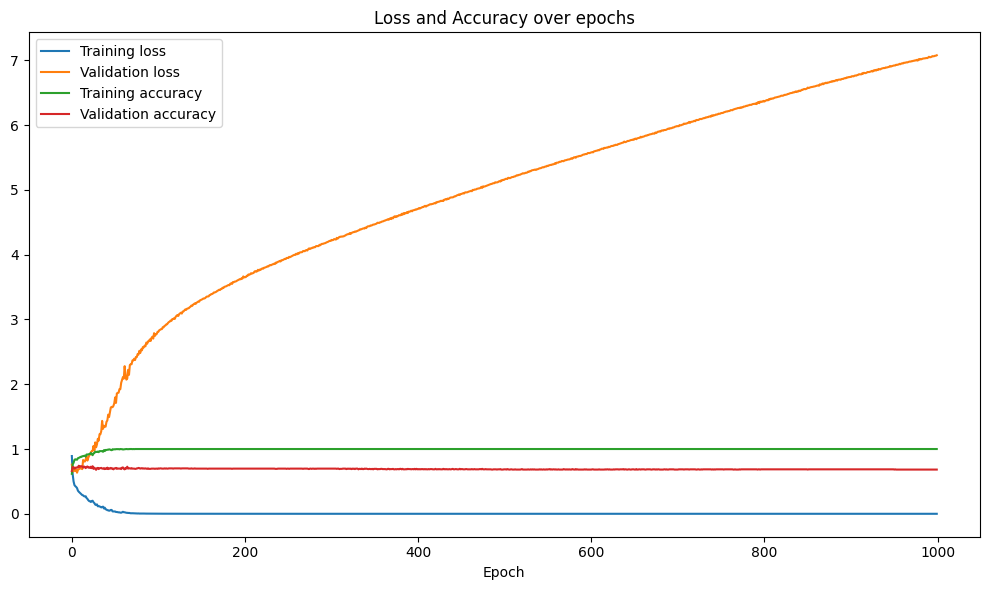

In [23]:
# Visualize the training results
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Loss and Accuracy over epochs')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()

gender_score = gender_model.evaluate(x_valid, y_valid, verbose=0)
print('Validation loss:', gender_score[0])
print('Validation accuracy:', gender_score[1])